<a href="https://colab.research.google.com/github/dev9310/Deep-Learning/blob/main/Butterfly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
butterfly_path = kagglehub.dataset_download('phucthaiv02/butterfly-image-classification')

print('Data source import complete.')


100%|██████████| 226M/226M [00:06<00:00, 37.6MB/s]

Extracting files...


Data source import complete.


In [2]:
import os

os.chdir(butterfly_path)
os.listdir(butterfly_path)

['test', 'Training_set.csv', 'Testing_set.csv', 'train']

In [3]:
import numpy as np # linear algebr
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

In [4]:
data_path = butterfly_path
os.chdir(data_path)
os.listdir(data_path)

['test', 'Training_set.csv', 'Testing_set.csv', 'train']

In [5]:
y_train_df = pd.read_csv('Training_set.csv')
y_test_df = pd.read_csv('Testing_set.csv')

In [6]:
train_dir = os.path.join(data_path , 'train')
test_dir = os.path.join(data_path ,'test')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 30
target_size = (224,224)
train_datagen = ImageDataGenerator(rescale=1./255 , validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=y_train_df,
    directory= train_dir,
    x_col='filename',
    y_col='label',
    batch_size=batch_size,
    target_size=target_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=y_train_df,
    directory= train_dir,
    x_col='filename',
    y_col='label',
    batch_size=batch_size,
    target_size=target_size,
    class_mode='categorical',
    subset='validation'

)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=y_test_df,
    directory=test_dir,
    x_col='filename',
    y_col=None,
    batch_size=batch_size,
    target_size=target_size,
    class_mode=None

)

Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.
Found 2786 validated image filenames.


In [8]:
num_classes = len(train_generator.class_indices.keys())
print(num_classes)

75


In [9]:
from tensorflow.keras import layers ,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D ,MaxPooling2D , Dense ,Dropout ,Flatten ,InputLayer ,Input ,BatchNormalization


In [10]:
input_shape = (224,224,3)

model = Sequential()

model.add(Input(shape=(224, 224, 3)))


model.add(Conv2D(32 ,kernel_size=(3,3) , activation='relu' , padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), activation='relu', padding='same' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2 )))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2 )))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(layers.Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 256)           │              

 Total params: 7,442,187 (28.39 MB)

 Trainable params: 7,440,715 (28.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [11]:
callbacks = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam' , metrics=['accuracy'])

history = model.fit(train_generator , validation_data=val_generator , epochs=100 , callbacks=callbacks)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


174/174 ━━━━━━━━━━━━━━━━━━━━ 46s 154ms/step - accuracy: 0.0496 - loss: 4.3457 - val_accuracy: 0.0169 - val_loss: 4.2975
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 54s 82ms/step - accuracy: 0.0861 - loss: 3.8849 - val_accuracy: 0.0508 - val_loss: 4.4637
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.1643 - loss: 3.4400 - val_accuracy: 0.1955 - val_loss: 3.2889
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.2776 - loss: 2.8345 - val_accuracy: 0.2771 - val_loss: 3.1342
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.3980 - loss: 2.2395 - val_accuracy: 0.4126 - val_loss: 2.5575
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.5128 - loss: 1.7028 - val_accuracy: 0.3880 - val_loss: 2.6792
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.6201 - loss: 1.3114 - val_accuracy: 0.5196 - val_loss: 2.1067
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.7125 - loss: 0.9310 - val

In [ ]:
# test_loss, test_acc = model.evaluate(test_generator)
# print("Test     loss:", test_loss)
# print("Test accuracy:", test_acc)

In [14]:
model.save('butterfly_model.keras')

In [ ]:
idx = random.randint(0,6499)
img = Image.open(os.path.join(train_dir,y_train[idx][0]))
print(np.array(img).shape)
plt.imshow(img)
plt.title(f'{idx} - {y_train[idx][1]}')
plt.show()

NameError: name 'random' is not defined

NameError: name 'train_dir' is not defined

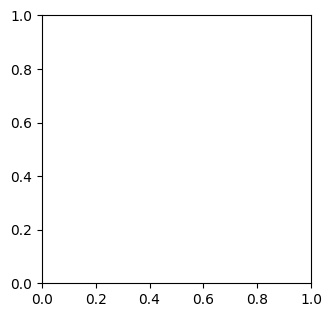

In [ ]:
nrow = 4
ncol = 4

index = random.sample(range(0,6500) , nrow*ncol)

plt.figure(figsize=(16,16))
for i in range(nrow *ncol):


    plt.subplot(nrow , ncol, i+1)
    img = Image.open(os.path.join(train_dir,y_train[index[i]][0]))
    plt.title(f' {y_train[index[i]][1]}')
    plt.imshow(img)


In [ ]:

len(y_train_df['label'].unique())

In [ ]:
y_train_df.shape

In [ ]:
os.listdir(train_dir)

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        details = tf.config.experimental.get_device_details(gpu)
        print(f"GPU Name: {details['device_name']}")
        print("GPU is available")
else:
    print("GPU is not available")
